In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("datasets/bank-additional-full.csv", sep=";")
df

# default تأمين
# housing قرض اسكان
# loan قرض شخصي
# Campaign: number of contacts performed during this campaign and for client
# Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
# Previous: number of contacts performed before this campaign and for this client (numeric)
# Poutcome: outcome of the previous marketing campaign (categorical:'failure','nonexistent','success')


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [5]:
print("Shape:", df.shape)

Shape: (41188, 21)


In [7]:
print("Columns:", df.columns.tolist())

Columns: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


In [9]:
print(df.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [11]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 12


In [13]:
if duplicates > 0:
    data = df.drop_duplicates()
    print("Shape after removing duplicates:", data.shape)
else:
    print("No duplicates found.")

Shape after removing duplicates: (41176, 21)


In [15]:
# Drop 'duration' (عشان مش ينفع نستخدمه فعلياً)
df = df.drop(columns=["duration"])

y
no     36548
yes     4640
Name: count, dtype: int64


C:\Users\20114\AppData\Local\Temp\ipykernel_22624\2336631792.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="y", palette="Set2")


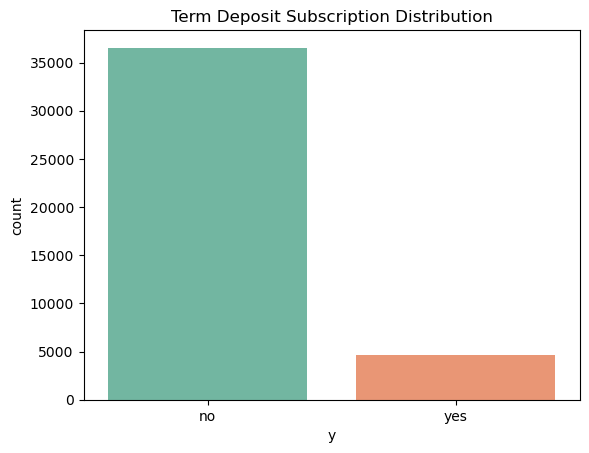

In [17]:
print(df['y'].value_counts())
sns.countplot(data=df, x="y", palette="Set2")
plt.title("Term Deposit Subscription Distribution")
plt.show()


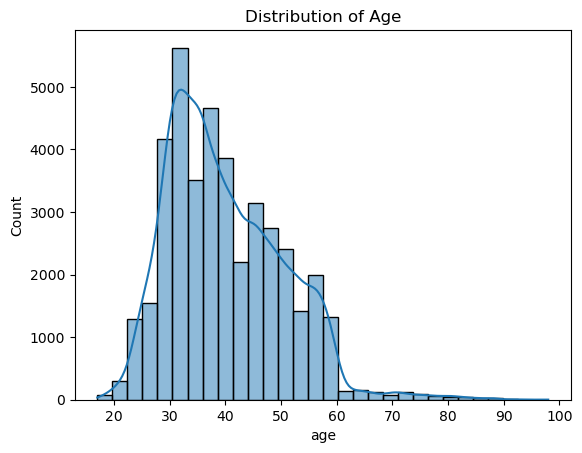

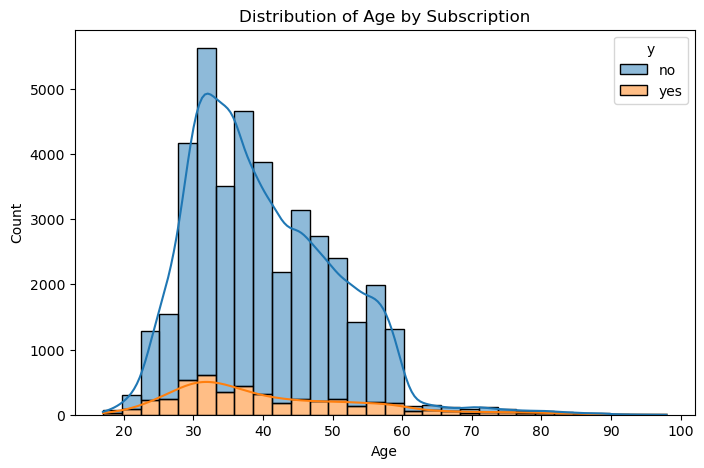

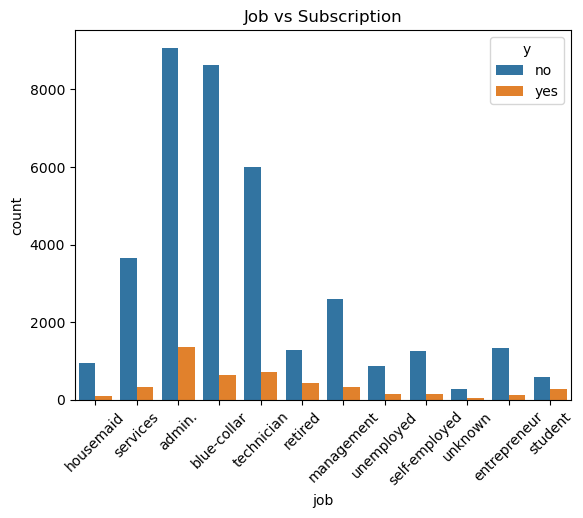

In [18]:
# توزيع العمر
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Distribution of Age")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(data=df, x='age', hue='y', bins=30, kde=True, multiple="stack")
plt.title("Distribution of Age by Subscription")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# العلاقة بين المهنة والاشتراك
sns.countplot(data=df, x='job', hue='y')
plt.xticks(rotation=45)
plt.title("Job vs Subscription")
plt.show()


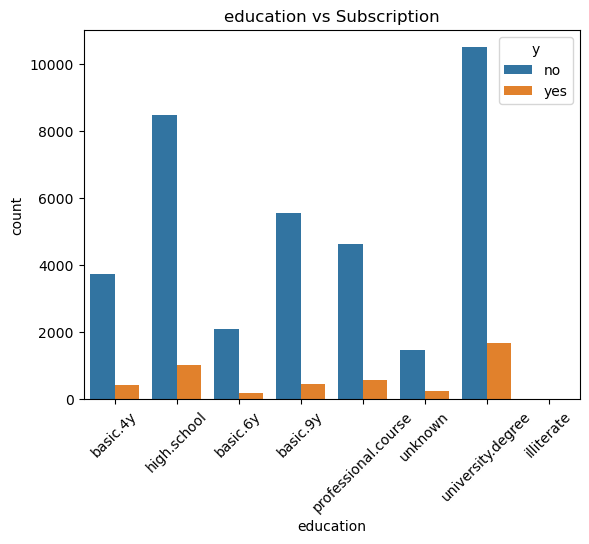

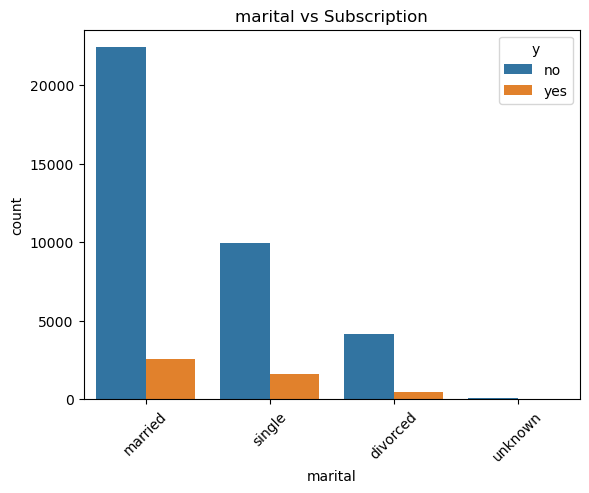

In [20]:
sns.countplot(data=df, x='education', hue='y')
plt.xticks(rotation=45)
plt.title("education vs Subscription")
plt.show()
sns.countplot(data=df, x='marital', hue='y')
plt.xticks(rotation=45)
plt.title("marital vs Subscription")
plt.show()

<Axes: xlabel='housing', ylabel='count'>

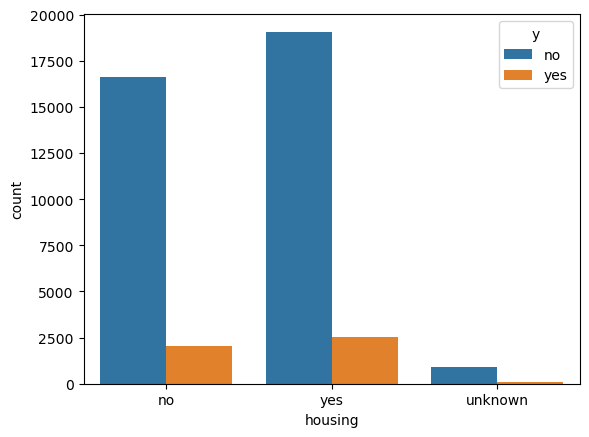

In [21]:
sns.countplot(data=df, x="housing", hue="y")


<Axes: xlabel='loan', ylabel='count'>

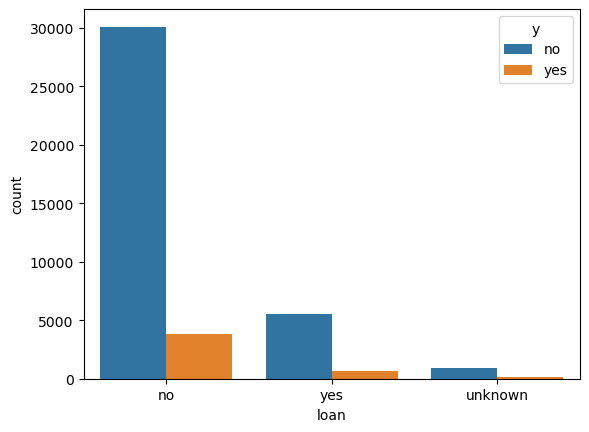

In [22]:
sns.countplot(data=df, x="loan", hue="y")


<Axes: xlabel='default', ylabel='count'>

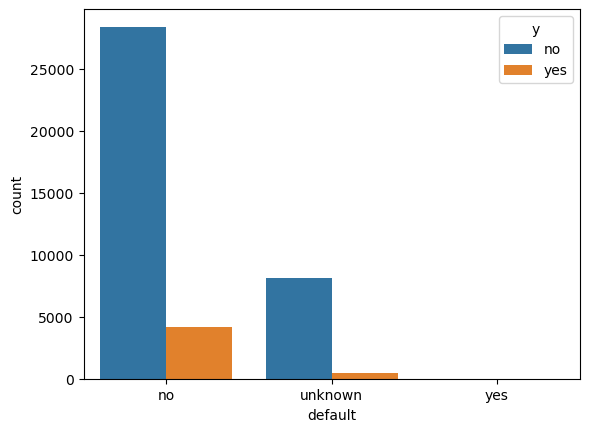

In [23]:
sns.countplot(data=df, x="default", hue="y")


<Axes: xlabel='campaign', ylabel='Count'>

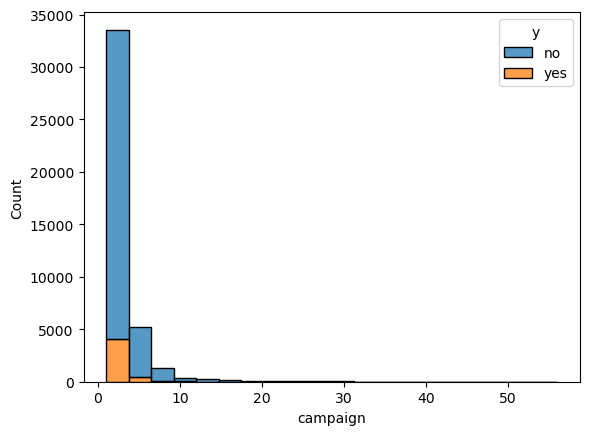

In [25]:
sns.histplot(data=df, x="campaign", hue="y", bins=20, multiple="stack")


<Axes: xlabel='poutcome', ylabel='y'>

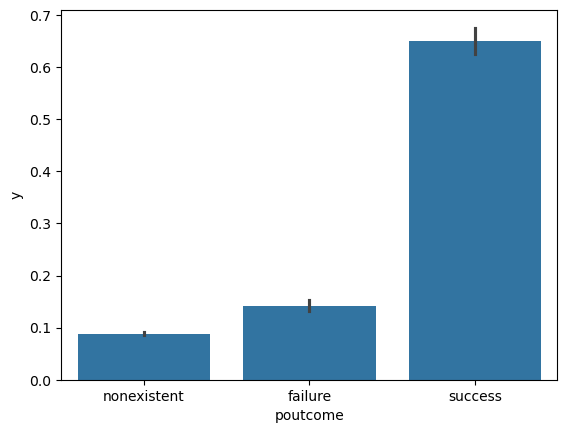

In [27]:
sns.barplot(data=df, x="poutcome", y=df["y"].map({"no":0,"yes":1}))
#لو العميل اتصلوا بيه مؤخرًا → هل فرص الاشتراك بتزيد 

<Axes: xlabel='contact', ylabel='count'>

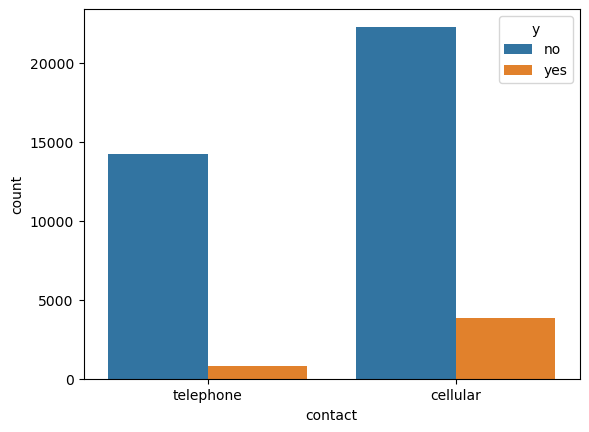

In [29]:
sns.countplot(data=df, x="contact", hue="y")


<Axes: xlabel='month', ylabel='count'>

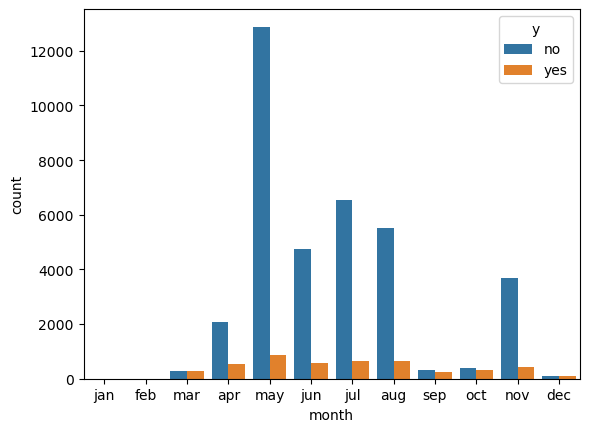

In [33]:
sns.countplot(data=df, x="month", hue="y", order=["jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"])


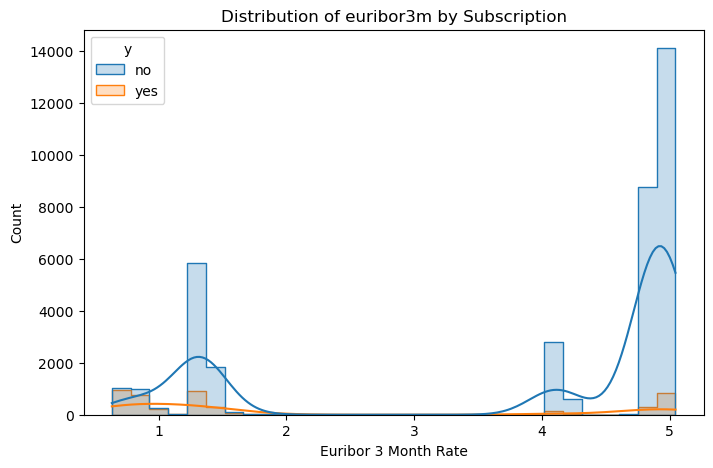

In [34]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="euribor3m", hue="y", bins=30, kde=True, element="step")
plt.title("Distribution of euribor3m by Subscription")
plt.xlabel("Euribor 3 Month Rate")
plt.ylabel("Count")
plt.show()


In [38]:
from scipy.stats import ttest_ind

# فصل البيانات حسب الاشتراك
eur_yes = df[df["y"] == "yes"]["euribor3m"]
eur_no  = df[df["y"] == "no"]["euribor3m"]

# اختبار T-test
t_stat, p_val = ttest_ind(eur_yes, eur_no, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("✅ الفرق مهم إحصائيًا: euribor3m بيأثر على قرار الاشتراك")
else:
    print("❌ الفرق مش مهم إحصائيًا")


T-statistic: -62.57987242559776
P-value: 0.0
✅ الفرق مهم إحصائيًا: euribor3m بيأثر على قرار الاشتراك


In [41]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [49]:
# ========================
# Feature Selection
# ========================
features = ['age','job','default','loan','poutcome','campaign','contact','education','euribor3m']
X = df[features]
y = df['y'].map({"no": 0, "yes": 1})

# ========================
# Train/Test Split (first)
# ========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ========================
# Preprocessing 
# ========================
num_feat = ['age','campaign','euribor3m']
cat_feat = ['job','default','loan','poutcome','contact','education']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_feat),
        ('cat', OneHotEncoder(handle_unknown="ignore"), cat_feat)
    ])




In [59]:
preprocessor


ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['age', 'campaign', 'euribor3m']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['job', 'default', 'loan', 'poutcome',
                                  'contact', 'education'])])

In [65]:
# ========================
# Apply Preprocessing and Print Encoded Data
# ========================

# Fit على Train
X_train_enc = preprocessor.fit_transform(X_train)
X_test_enc = preprocessor.transform(X_test)

# جلب أسماء الأعمدة بعد الـ OneHotEncoder
ohe = preprocessor.named_transformers_['cat']
cat_columns = ohe.get_feature_names_out(cat_feat)

# أسماء الأعمدة النهائية (الرقمية + الـ OneHot)
all_columns = num_feat + list(cat_columns)

# تحويل ل DataFrame عشان يبان بشكل منظم
X_train_df = pd.DataFrame(
    X_train_enc.toarray() if hasattr(X_train_enc, "toarray") else X_train_enc,
    columns=all_columns,
    index=X_train.index
)

X_test_df = pd.DataFrame(
    X_test_enc.toarray() if hasattr(X_test_enc, "toarray") else X_test_enc,
    columns=all_columns,
    index=X_test.index
)

print("\nSample Encoded Train Data:")
print(X_train_df.head())

print("\nSample Encoded Test Data:")
print(X_test_df.head())



Sample Encoded Train Data:
            age  campaign  euribor3m  job_admin.  job_blue-collar  \
7309   0.961016 -0.202499   0.714873         0.0              1.0   
4169   1.057229  0.887201   0.713720         0.0              0.0   
35810  0.576165 -0.202499  -1.368338         0.0              0.0   
9668   0.576165 -0.565732   0.773060         1.0              0.0   
34389 -1.444302  0.887201  -1.355664         0.0              0.0   

       job_entrepreneur  job_housemaid  job_management  job_retired  \
7309                0.0            0.0             0.0          0.0   
4169                0.0            0.0             0.0          0.0   
35810               0.0            0.0             0.0          0.0   
9668                0.0            0.0             0.0          0.0   
34389               0.0            0.0             0.0          0.0   

       job_self-employed  ...  contact_cellular  contact_telephone  \
7309                 0.0  ...               0.0             

In [63]:
# ========================
# Logistic Regression
# ========================
log_reg = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('clf', LogisticRegression(max_iter=2000))
])

log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print("Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ========================
# Random Forest (baseline)
# ========================
rf = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('clf', RandomForestClassifier(n_estimators=300, random_state=42, class_weight="balanced"))
])

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Logistic Regression Results
Accuracy: 0.8998138706805859
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10965
           1       0.72      0.18      0.29      1392

    accuracy                           0.90     12357
   macro avg       0.81      0.59      0.62     12357
weighted avg       0.88      0.90      0.87     12357


Random Forest Results
Accuracy: 0.8817674192765235
              precision    recall  f1-score   support

           0       0.91      0.96      0.94     10965
           1       0.46      0.27      0.34      1392

    accuracy                           0.88     12357
   macro avg       0.68      0.61      0.64     12357
weighted avg       0.86      0.88      0.87     12357



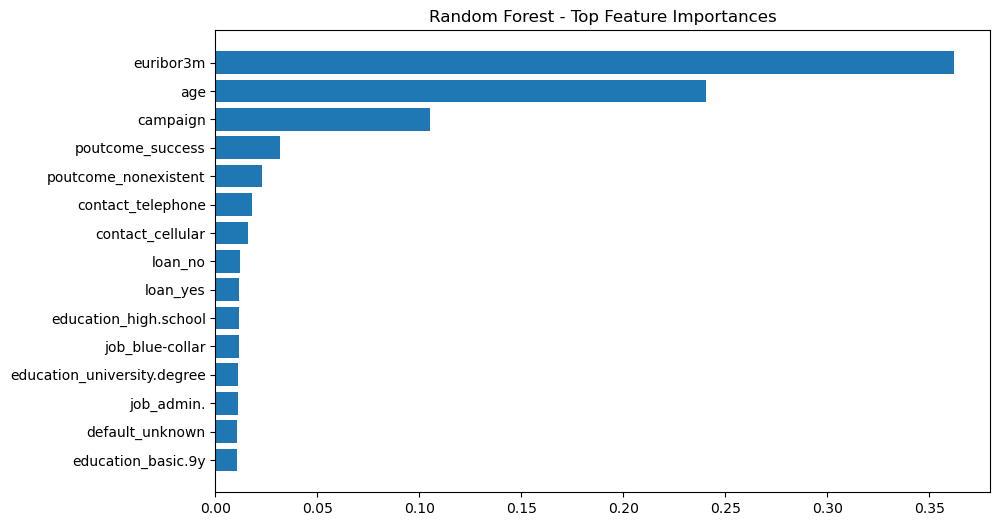

In [69]:


import matplotlib.pyplot as plt
import numpy as np

# Feature importance from RF
feature_names = num_feat + list(rf.named_steps['preprocess']
                                .transformers_[1][1]  # OneHotEncoder
                                .get_feature_names_out(cat_feat))

importances = rf.named_steps['clf'].feature_importances_
indices = np.argsort(importances)[-15:]  # أهم 15 feature

plt.figure(figsize=(10,6))
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.title("Random Forest - Top Feature Importances")
plt.show()


In [71]:
probs = rf.predict_proba(X_test)[:,1]
results = pd.DataFrame({"probability": probs, "true": y_test.values})
print(results.head())


   probability  true
0     0.026667     0
1     0.003333     0
2     0.010000     0
3     0.000000     0
4     0.413510     1


In [77]:
# ========================
# Business Value → Segmentation
# ========================
# احتمالية الاشتراك من Logistic Regression
y_proba = log_reg.predict_proba(X_test)[:, 1]  # العمود التاني = احتمالية "Yes"

# نعمل DataFrame يوضح العميل واحتمالية اشتراكه + التوقع النهائي
results = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred,
    "Probability": y_proba
}, index=X_test.index)

def segment(prob):
    if prob > 0.7:
        return "High Probability → ركّز في الحملة"
    elif prob >= 0.4:
        return "Medium Probability → محتاج متابعة إضافية"
    else:
        return "Low Probability → مش أولوية"

results["Segment"] = results["Probability"].apply(segment)

print(results)


       Actual  Predicted  Probability  \
9923        0          0     0.059951   
3477        0          0     0.021763   
12077       0          0     0.044828   
1579        0          0     0.020319   
39993       1          1     0.661794   
...       ...        ...          ...   
18457       0          0     0.044870   
12561       0          0     0.055027   
20958       0          0     0.068302   
32448       0          0     0.120788   
1454        0          0     0.044986   

                                        Segment  
9923                Low Probability → مش أولوية  
3477                Low Probability → مش أولوية  
12077               Low Probability → مش أولوية  
1579                Low Probability → مش أولوية  
39993  Medium Probability → محتاج متابعة إضافية  
...                                         ...  
18457               Low Probability → مش أولوية  
12561               Low Probability → مش أولوية  
20958               Low Probability → مش أولوية  
32448  